In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Replace with your actual file path
df = pd.read_csv('Merged_IMDBTop400.csv', encoding='ISO-8859-1')

In [11]:
#preview the dataset
print(df.head())

       Genre                          Movie Name       Year      Rating  \
0  Adventure                             1. Echo  2023?2024   6.1?(24K)   
1  Adventure              2. Society of the Snow       2023   7.9?(64K)   
2  Adventure  3. Percy Jackson and the Olympians      2023?   7.4?(18K)   
3  Adventure                  4. Game of Thrones  2011?2019  9.2?(2.2M)   
4  Adventure                         5. Napoleon       2023   6.5?(95K)   

            Votes            Type  \
0     Votes23,699  TV Mini Series   
1     Votes64,320             NaN   
2     Votes18,020       TV Series   
3  Votes2,247,841       TV Series   
4     Votes95,398             NaN   

                                   Detail/Main Story  Metascore  
0  Maya Lopez must face her past, reconnect with ...        NaN  
1  The flight of a rugby team crashes on a glacie...       72.0  
2  Demigod Percy Jackson leads a quest across Ame...        NaN  
3  Nine noble families fight for control over the...        Na

In [13]:
#Check for missing value 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              6800 non-null   object 
 1   Movie Name         6800 non-null   object 
 2   Year               6800 non-null   object 
 3   Rating             6795 non-null   object 
 4   Votes              6785 non-null   object 
 5   Type               2988 non-null   object 
 6   Detail/Main Story  6789 non-null   object 
 7   Metascore          3498 non-null   float64
dtypes: float64(1), object(7)
memory usage: 425.1+ KB
None


In [15]:
print(df.isnull().sum())

Genre                   0
Movie Name              0
Year                    0
Rating                  5
Votes                  15
Type                 3812
Detail/Main Story      11
Metascore            3302
dtype: int64


In [17]:
#drop rows which are not need or with missing value
df.drop(columns=['Votes', 'Type', 'Detail/Main Story', 'Metascore'], inplace=True)

In [19]:
df['Year']=df['Year'].apply(lambda x: x.split('?')[0])

df

,Genre,Movie Name,Year,Rating
0,Adventure,1. Echo,2023,6.1?(24K)
1,Adventure,2. Society of the Snow,2023,7.9?(64K)
2,Adventure,3. Percy Jackson and the Olympians,2023,7.4?(18K)
3,Adventure,4. Game of Thrones,2011,9.2?(2.2M)
4,Adventure,5. Napoleon,2023,6.5?(95K)
...,...,...,...,...
6795,War,396. Helen of Troy,2003,6.2?(6.7K)
6796,War,397. Anne of Green Gables: The Continuing Story,2000,6.8?(5K)
6797,War,398. Ayla,2017,8.3?(43K)
6798,War,399. The Lost Battalion,2001,7.0?(8.1K)


In [21]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') #Convert Non numeric to NaN
df=df.dropna(subset=['Year']) #drop rows with invalid year
df['Year']= df['Year'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_7544\2703715793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']= df['Year'].astype(int)


In [23]:

#Filtering dataset 
df_filtered=df[(df['Year']>= 2021) & (df['Year']<=2025)]

In [25]:
df

,Genre,Movie Name,Year,Rating
0,Adventure,1. Echo,2023,6.1?(24K)
1,Adventure,2. Society of the Snow,2023,7.9?(64K)
2,Adventure,3. Percy Jackson and the Olympians,2023,7.4?(18K)
3,Adventure,4. Game of Thrones,2011,9.2?(2.2M)
4,Adventure,5. Napoleon,2023,6.5?(95K)
...,...,...,...,...
6795,War,396. Helen of Troy,2003,6.2?(6.7K)
6796,War,397. Anne of Green Gables: The Continuing Story,2000,6.8?(5K)
6797,War,398. Ayla,2017,8.3?(43K)
6798,War,399. The Lost Battalion,2001,7.0?(8.1K)


In [27]:
print(df)

          Genre                                       Movie Name  Year  \
0     Adventure                                          1. Echo  2023   
1     Adventure                           2. Society of the Snow  2023   
2     Adventure               3. Percy Jackson and the Olympians  2023   
3     Adventure                               4. Game of Thrones  2011   
4     Adventure                                      5. Napoleon  2023   
...         ...                                              ...   ...   
6795        War                               396. Helen of Troy  2003   
6796        War  397. Anne of Green Gables: The Continuing Story  2000   
6797        War                                        398. Ayla  2017   
6798        War                          399. The Lost Battalion  2001   
6799        War                                  400. Stalingrad  2013   

          Rating  
0      6.1?(24K)  
1      7.9?(64K)  
2      7.4?(18K)  
3     9.2?(2.2M)  
4      6.5?(95K)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6798 entries, 0 to 6799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Genre       6798 non-null   object
 1   Movie Name  6798 non-null   object
 2   Year        6798 non-null   int32 
 3   Rating      6793 non-null   object
dtypes: int32(1), object(3)
memory usage: 239.0+ KB


In [31]:
df.drop(columns=['Votes', 'Type', 'Detail/Main Story', 'Metascore'], inplace=True)

KeyError: "['Votes', 'Type', 'Detail/Main Story', 'Metascore'] not found in axis"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Movie Per Year 

plt.figure(figsize=(8, 4))
sns.countplot(data=df_filtered, x='Year')
plt.title('Number of Movies Released per Year(2021-2025)')
plt.show()

In [ ]:
#Top Genres 
from collections import Counter
from collections import Counter 
#Split and count genres
all_genres = df_filtered['Genre'].str.split(', ').explode()
genre_counts = all_genres.value_counts()

#Plot Top Genres
genre_counts.plot(kind='bar', figsize=(10, 5), title='Genre Frequency (2021-2025)')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
#Additional Cleaning 

df_filtered['Year'] = pd.to_numeric(df_filtered['Year'], errors='coerce')
df_filtered['Rating'] = pd.to_numeric(df_filtered['Rating'], errors='coerce')

#Drop rows missing value
df_cleaned= df.dropna(subset=['Year', 'Rating'])
df_filtered = df_cleaned[(df_cleaned['Year'] >= 2020) & (df_cleaned['Year'] <=2025)]

C:\Users\HP\AppData\Local\Temp\ipykernel_7544\637795977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rating'] = pd.to_numeric(df_filtered['Rating'], errors='coerce')


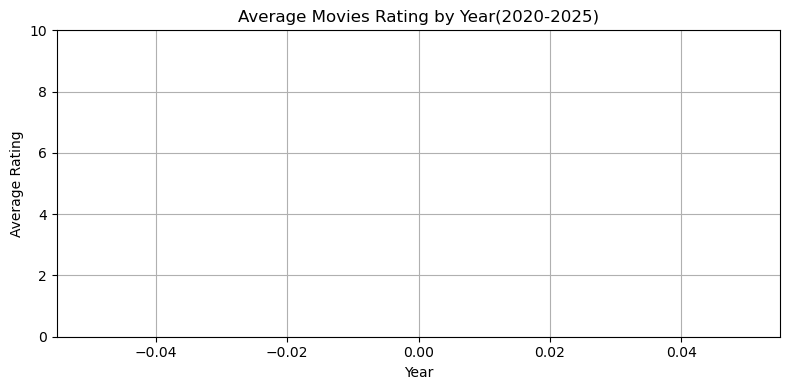

In [37]:
#Average Rating by Year 
import matplotlib.pyplot as plt

#converting rating column to numeric
df_filtered['Rating'] = pd.to_numeric(df_filtered['Rating'], errors='coerce')

#Drop rows with invalid(Nan)
df_filtered = df_filtered.dropna(subset=['Rating'])


avg_rating = df_filtered.groupby('Year')['Rating'].mean()

#Line chart 
plt.figure(figsize=(8, 4))
plt.plot(avg_rating.index, 
avg_rating.values, marker='o', 
linestyle='-', color='green')
plt.title("Average Movies Rating by Year(2020-2025)")
plt.xlabel("Year")
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.grid(True)
plt.tight_layout()
plt.savefig("avg_rating_trend.png")
plt.show()